# Object Detector
Goal: Build a object detection pipeline that can take in an image, determine what object it is of, then draw a bounding box and label on it.

Methodology:
1. Load test image
2. Load model
3. Classify test image
4. Determine bounding coordinates
5. Draw bounding coordindates
6. Draw label
7. Export pipeline

In [1]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.resnet50 import ResNet50
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from scipy import misc
from skimage.transform import resize

/home/peter/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# configure notebook
%matplotlib inline
sns.set()

# configure gpu
os.environ['CUDA_VISIBLE_DEVICES']='0'

## Variables

In [3]:
input_path = 'input_images/cup.jpg'

img_dim = 224

## Load Test Image

In [4]:
# load image
input_img_raw = image.load_img(input_path, target_size=(img_dim, img_dim))
input_img_array = image.img_to_array(input_img_raw)
input_img_batch = np.expand_dims(input_img_array, axis=0)
input_img_preprocessed = preprocess_input(input_img_batch)

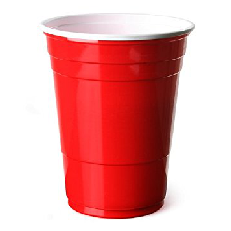

In [5]:
# show the raw image
plt.imshow(input_img_raw, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


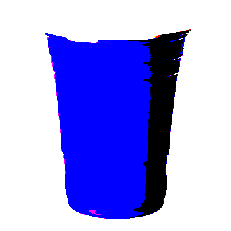

In [6]:
# show the preprocessed input image
plt.imshow(input_img_preprocessed[0], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

## Load Model

In [7]:
# Load the ResNet50 network
# requires input to be of shape (224, 224, 3)
model = ResNet50(weights='imagenet')

## Make a prediction

In [8]:
# make a prediction
prediction = model.predict(input_img_preprocessed)

In [10]:
# decode the prediction
decoded_prediction = decode_predictions(prediction, top=3)

40960/35363 [==================================] - 0s 4us/step


In [11]:
# print the prediction
print('Predicted: ', decoded_prediction)

Predicted:  [[('n02909870', 'bucket', 0.66390216), ('n07930864', 'cup', 0.13322386), ('n03062245', 'cocktail_shaker', 0.037100818)]]


## Determine bounding coordinates

## Draw bounding coordindates

## Draw label

## Export pipeline